### Problem 6.1 Show that the derivatives of the least squares loss function in equation 6.5 are given by the expressions in equation 6.7.

These are trivial one step derivatives.

### Problem 6.2 A surface is convex if the eigenvalues of the Hessian H[ϕ] are positive everywhere. In this case, the surface has a unique minimum, and optimization is easy. Find an algebraic expression for the Hessian matrix for the linear regression model (equation 6.5). Prove that this function is convex by showing that the eigenvalues are always positive. This can be done by showing that both the trace and the determinant of the matrix are positive.

The hessian is the matrix of partial derivatives.  

\begin{align}
    H[\phi] &= \begin{bmatrix}
        \frac{\partial^2L}{\partial\phi_0^2} & \frac{\partial^2L}{\partial\phi_0\partial\phi_1} \\
        \frac{\partial^2L}{\partial\phi_1\partial\phi_0} &  \frac{\partial^2L}{\partial\phi_0^2} \\
    \end{bmatrix}
\end{align}

where

\begin{align}
    \frac{\partial^2L}{\partial\phi_0^2} &= \sum\limits_i \frac{\partial^2l_i}{\partial\phi_0^2} \\
    &= \sum\limits_i\frac{\partial^2}{\partial\phi_0^2}(\phi_0 + \phi_1x_i - y_i)^2 \\
    &= \sum\limits_i\frac{\partial}{\partial\phi_0} 2 (\phi_0 + \phi_1x_i - y_i) \\
    &= \sum\limits_i 2 = 2N \\
    \frac{\partial^2L}{\partial\phi_0\partial\phi_1} &= \sum\limits_i \frac{\partial^2l_i}{\partial\phi_0\phi_1} \\
    &= \sum\limits_i \frac{\partial^2}{\partial\phi_0\phi_1} (\phi_0 + \phi_1x_i - y_i)^2 \\
    &= \sum\limits_i \frac{\partial}{\partial\phi_0} 2x_i(\phi_0 + \phi_1x_i - y_i) \\
    &= \sum\limits_i 2x_i = 2N\bar{x}\\
    \frac{\partial^2L}{\partial\phi_1\partial\phi_0} &= \frac{\partial^2L}{\partial\phi_0\partial\phi_1} \\
    &= 2N\bar{x} \\
    \frac{\partial^2L}{\partial\phi_1^2} &= \sum\limits_i \frac{\partial^2l_i}{\partial\phi_1^2} \\
    &= \sum\limits_i \frac{\partial^2}{\partial\phi_1^2}(\phi_0 + \phi_1x_i - y_i)^2 \\
    &= \sum\limits_i \frac{\partial}{\partial\phi_1}2x_i(\phi_0 + \phi_1x_i - y_i)\\
    &= \sum\limits_i 2x_i^2 = 2N\bar{x^2}\\
\end{align}

so 

\begin{align}
    H[\phi] &= 2N\begin{bmatrix}
        1 & \bar{x} \\
        \bar{x} &  \bar{x^2} \\
    \end{bmatrix}
\end{align}

then

\begin{align}
    tr[H] = 2N(1 + \bar{x^2}) >= 0 \forall x
\end{align}

and 

\begin{align}
    \det[H] = 2N (\bar{x^2} - \bar{x}^2) = 2N Var(x) >= 0 \forall x
\end{align}


### Problem 6.3 Compute the derivatives of the least squares loss L[ϕ] with respect to the parameters ϕ0 and ϕ1 for the Gabor model (equation 6.8).

\begin{align}
    f[x, \phi] &= \sin[\phi_0 + 0.06\phi_1x]*\exp\left[-\frac{(\phi_0 + 0.06\phi_1x)^2}{32.0} \right] \\
    L[\phi] &= \sum\limits_i l_i = \sum\limits_i (f[x_i, \phi] - y_i)^2 \\
    &= \sum\limits_i \left(\sin[\phi_0 + 0.06\phi_1x_i]*\exp\left[-\frac{(\phi_0 + 0.06\phi_1x_i)^2}{32.0} \right] - y_i\right)^2 \\
    \frac{\partial l_i}{\partial \phi_0} &= 2(f[x_i, \phi] - y_i)\frac{\partial}{\partial\phi_0}\left(\sin[\phi_0 + 0.06\phi_1x_i]*\exp\left[-\frac{(\phi_0 + 0.06\phi_1x)^2}{32.0} \right]\right) \\
    &= 2(f[x_i, \phi] - y_i) \cdot \left( \cos[\phi_0 + 0.06\phi_1x_i] \cdot \exp\left[-\frac{(\phi_0 + 0.06\phi_1x)^2}{32.0} \right]  - \frac{\phi_0 + 0.06\phi_1x_i}{16} \sin[\phi_0 + 0.06\phi_1x_i]\exp\left[-\frac{(\phi_0 + 0.06\phi_1x)^2}{32.0} \right] \right)
\end{align}

with something equally gross for $\frac{\partial l_i}{\partial phi_1}$. This does not seem amenable to nice simplification, so I don't know what the point is.

### Problem 6.4∗ The logistic regression model uses a linear function to assign an input x to one of two classes y ∈ {0, 1}. For a 1D input and a 1D output, it has two parameters, ϕ0 and ϕ1, and is defined by: P r(y = 1|x) = sig[ϕ0 + ϕ1x], (6.21) where sig[•] is the logistic sigmoid function: sig[z] = 1 1 + exp[−z]. (i) Plot y against x for this model for different values of ϕ0 and ϕ1 and explain the qualitative meaning of each parameter. (ii) What is a suitable loss function for this model? (iii) Compute the derivatives of this loss function with respect to the parameters. (iv) Generate ten data points from a normal distribution with mean -1 and standard deviation 1 and assign them the label y = 0. Generate another ten data points from a normal distribution with mean 1 and standard deviation 1 and assign these the label y = 1. Plot the loss as a heatmap in terms of the two parameters ϕ0 and ϕ1. (v) Is this loss function convex? How could you prove this?

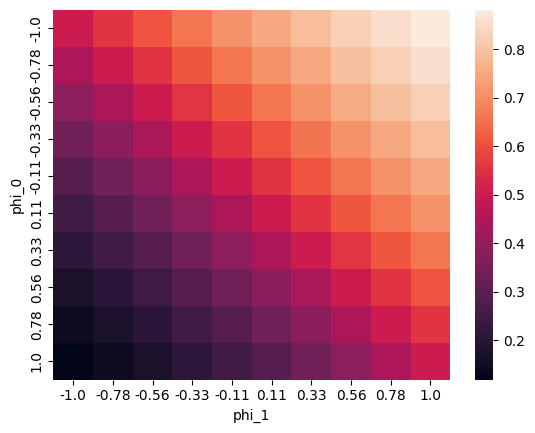

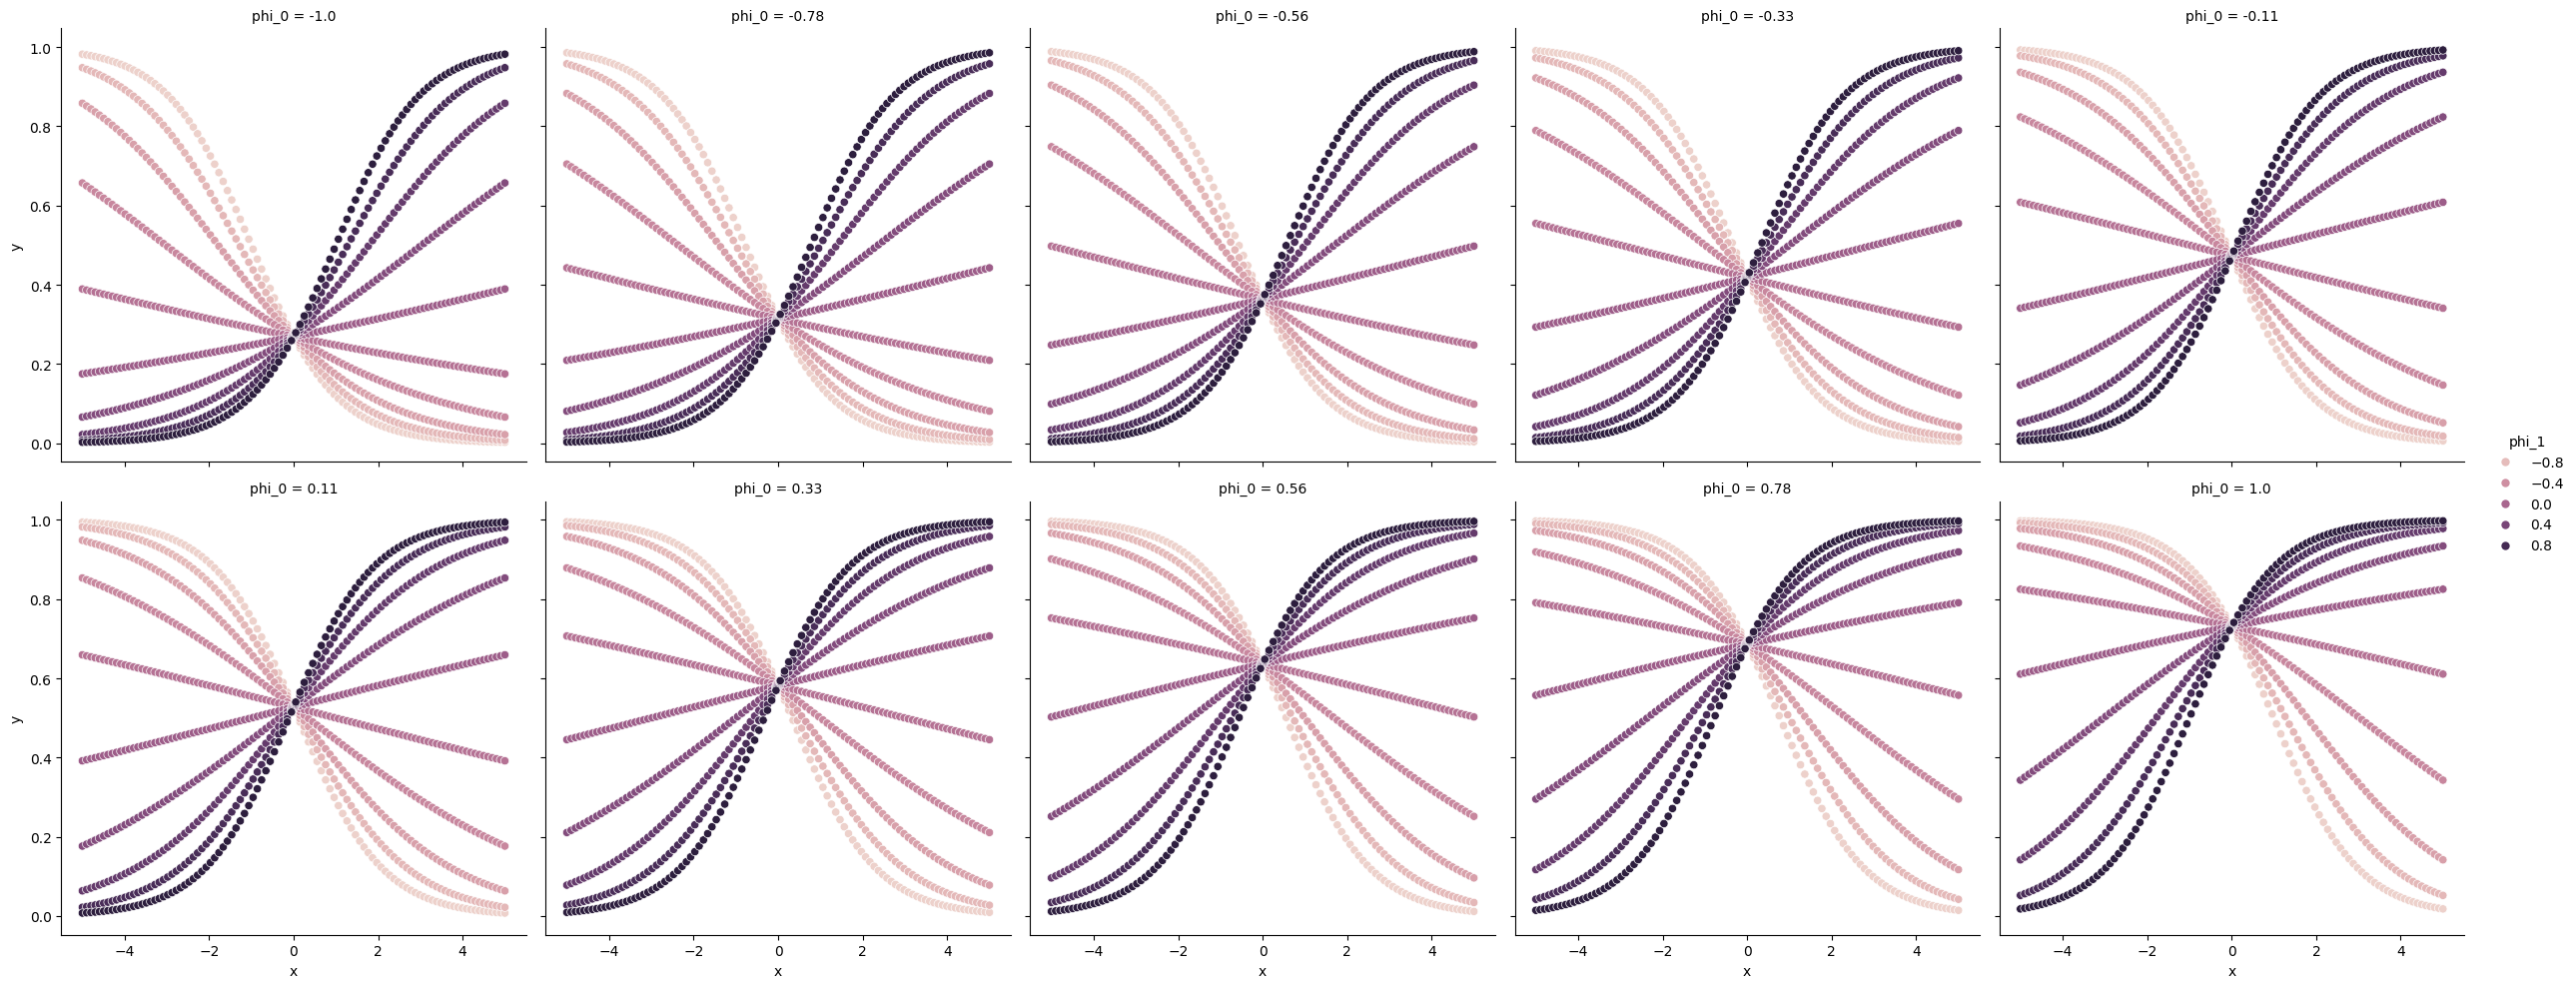

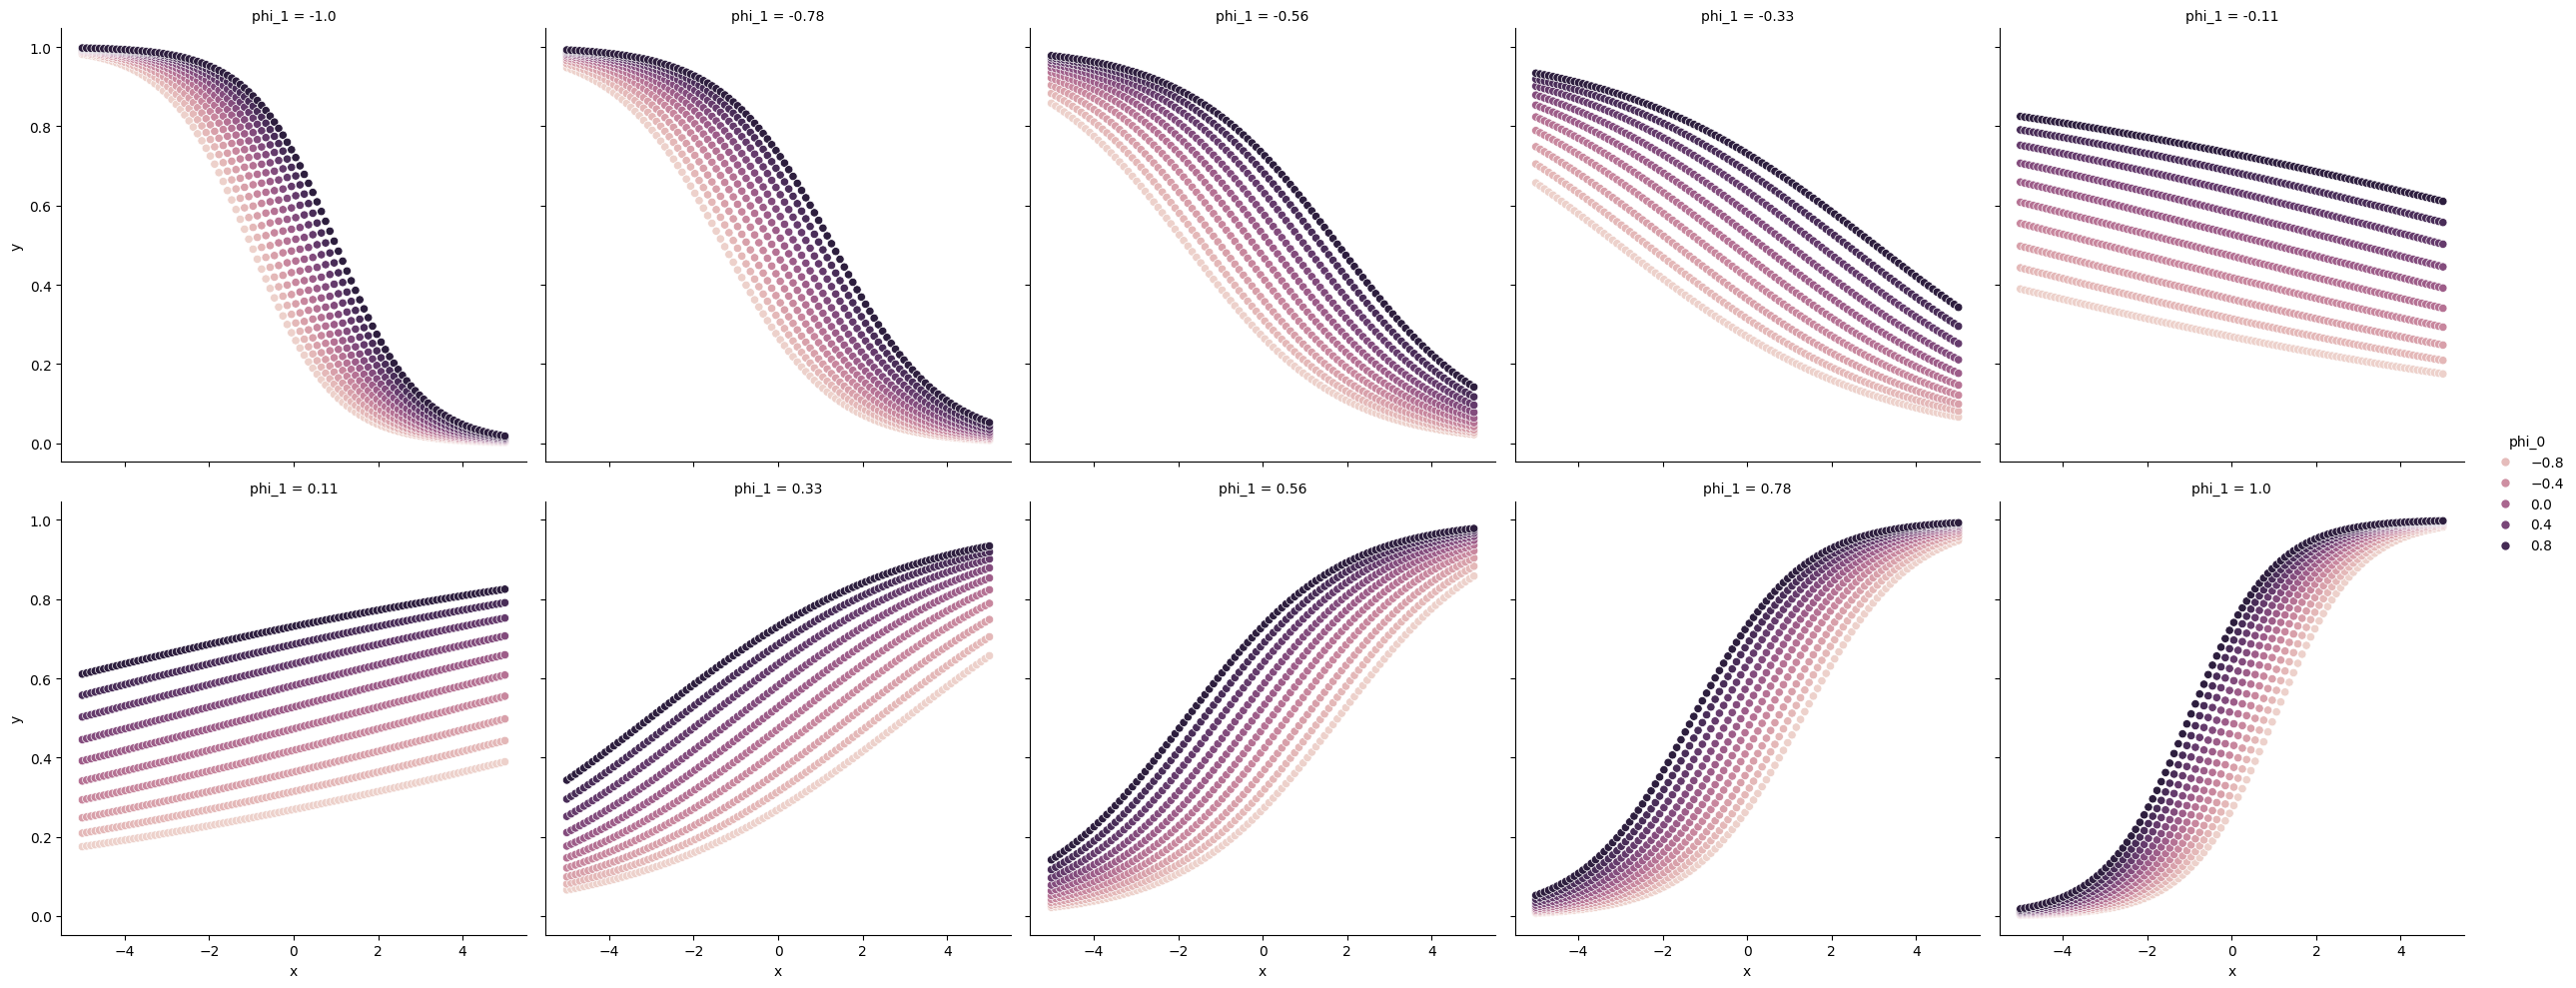

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def sig(z):
    return 1 / (1 + np.exp(-z))

def logistic(x, phi_0, phi_1):
    return sig(phi_0 + phi_1*x)

minmax = 1
res = 10
phi_0 = np.round(np.linspace(-minmax, minmax, res), 2)
phi_1 = np.round(np.linspace(-minmax, minmax, res), 2)



p0, p1 = np.meshgrid(phi_0, phi_1)

out = logistic(-1, p0, p1)
df = pd.DataFrame(out, index=pd.Index(phi_0, name='phi_0'), columns=pd.Index(phi_1, name='phi_1'))
sns.heatmap(df)

x = np.linspace(-5, 5, 100)

p0, p1, xx = np.meshgrid(phi_0, phi_1, x)

data = pd.concat([
    pd.Series(p0.flatten(), name='phi_0'),
    pd.Series(p1.flatten(), name='phi_1'),
    pd.Series(xx.flatten(), name='x'),    
], axis=1)
data['y'] = logistic(data['x'], data['phi_0'], data['phi_1'])

# phi_1 controls the steepness of the sigmoid
sns.relplot(x='x', y='y', hue='phi_1', col='phi_0', col_wrap=5, data=data)
# phi_0 controls the position
sns.relplot(x='x', y='y', hue='phi_0', col='phi_1', col_wrap=5, data=data)




(ii) We'll use a bernoulli distribution with parameter $\lambda$ for this, giving us a likelihood

\begin{align}
    P(y_i | x_i, \phi) &= (1 - \lambda[x_i, \phi])^{1 - y_i}\cdot \lambda[x_i, \phi]^{y_i} \\
    \lambda[x_i, \phi] &= sig[x_i, \phi] \\ 
    L[\phi] &= - \sum\limits_i (1 - y_i)\log[1 - sig[x_i, \phi]] + y_i\log[ sig[x_i, \phi]] \\
\end{align}

(iii)

\begin{align}
    \frac{\partial}{\partial z} sig[z] &= \frac{\partial}{\partial z} \frac{1}{1 + e^{-z}} \\
    &=  \frac{e^{-z}}{(1 + e^{-z})^2} \\    
    &= sig[z]\frac{e^{-z}}{1 + e^{-z}} \\
    &= sig[z]sig[-z]  = sig[z](1 - sig[z]) \\
    \frac{\partial l_i}{\partial z} &= \frac{1 - y_i}{1 - sig[z]]}sig[z](1 - sig[z]) - \frac{y_i}{sig[z]}sig[z](1 - sig[z]) \\
    &= (1-y_i)sig[z] - y_i(1 - sig[z]) \\
    &= sig[z] - y_i sig[z] - y_i + y_i sig[z] \\
    &= sig[z] - y_i \\
    \frac{\partial l_i}{\partial \phi_0} &= \frac{\partial l_i}{\partial z} \frac{\partial z}{\partial \phi_0} \\
    &= sig[\phi_0 + \phi_1 x_i] - y_i \\
    \frac{\partial l_i}{\partial \phi_1} &= \frac{\partial l_i}{\partial z} \frac{\partial z}{\partial \phi_1} \\
    &= (sig[\phi_0 + \phi_1 x_i] - y_i)x_i \\
\end{align}




<Axes: xlabel='phi_1', ylabel='phi_0'>

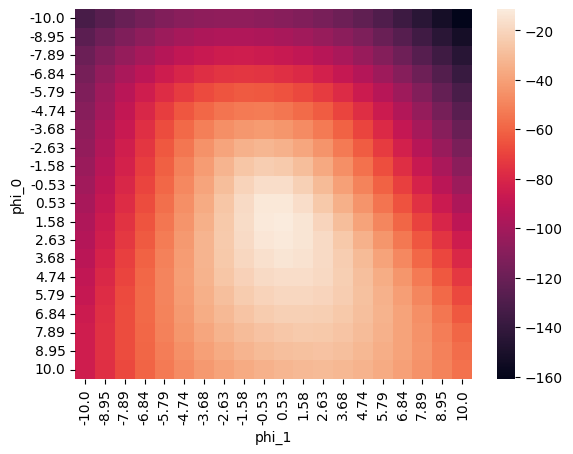

In [35]:
# iv) Generate ten data points from a normal distribution with mean -1 and standard deviation 1 and assign them the label y = 0. Generate another ten data points from a normal distribution with mean 1 and standard deviation 1 and assign these the label y = 1. Plot the loss as a heatmap in terms of the two parameters ϕ0 and ϕ1. (v) Is this loss function convex? How could you prove this?
rs = np.random.RandomState(42)
x = np.hstack([
    rs.normal(loc=-1, scale=1, size=10),
    rs.normal(loc=1, scale=1, size=10),
])
y = np.hstack([
    np.zeros(10),
    np.ones(10),
])

minmax = 10
res = 20
phi_0 = np.round(np.linspace(-minmax, minmax, res), 2)
phi_1 = np.round(np.linspace(-minmax, minmax, res), 2)

p0, p1 = np.meshgrid(phi_0, phi_1)

def loss(y, x, p0, p1):
    x = x.reshape(1, x.size)
    y = y.reshape(1, y.size)
    p0 = p0.reshape(*p0.shape, 1)
    p1 = p1.reshape(*p1.shape, 1)

    loss = np.sum((1 - y) * np.log(1 - logistic(x, p0, p1)) + y * np.log(logistic(x, p0, p1)), axis=-1)
    return loss

l = pd.DataFrame(
    loss(y, x, p0, p1),
    index=pd.Series(phi_0, name='phi_0'),
    columns=pd.Series(phi_1, name='phi_1'),
)
sns.heatmap(l)


(v) The loss function is convex. We can prove it by looking at the hessian matrix.

\begin{align}
    \frac{\partial^2 l_i}{\partial \phi_0^2} &= \frac{\partial l_i}{\partial \phi_0} sig[\phi_0 + \phi_1 x_i] - y_i \\
    &= sig[\phi_0 + \phi_1 x_i] (1 - sig[\phi_0 + \phi_1 x_i]) \\
    & = 1 - sig[\phi_0 + \phi_1 x_i]^2 \\
    \frac{\partial^2 l_i}{\partial \phi_1^2} &= \frac{\partial l_i}{\partial \phi_0} (sig[\phi_0 + \phi_1 x_i] - y_i)x_i \\
    &= x_i^2(1 - sig[\phi_0 + \phi_1 x_i]^2) \\
    \frac{\partial^2 l_i}{\partial \phi_0 \phi_1} &= \frac{\partial l_i}{\partial \phi_0} (sig[\phi_0 + \phi_1 x_i] - y_i)x_i \\
    &= x_i(1 - sig[\phi_0 + \phi_1 x_i]^2)
\end{align}

This will end up with trace

\begin{align}
    tr[H] &= \sum_i (1 + x_i^2) (1 - sig[\phi_0 + \phi_1 x_i]^2)
\end{align}

which is always positive as $sig[z]^2$ lies in $[0, 1)$

The determinant is 

\begin{align}
    \det[H] &= \sum_i x_i^2(1 - sig[\phi_0 + \phi_1 x_i]^2)^2 - (\sum_i x_i(1 - sig[\phi_0 + \phi_1 x_i]^2))^2
\end{align}

which is also always positive.

### Problem 6.5∗ Compute the derivatives of the least squares loss with respect to the ten parameters of the simple neural network model introduced in equation 3.1: f[x, ϕ] = ϕ0 + ϕ1a[θ10 + θ11x] +  2a[θ20 + θ21x] + ϕ3a[θ30 + θ31x]. (6.23) Think carefully about what the derivative of the ReLU function a[•] will be.

\begin{align}
    L[\phi] &= - \sum_i (\phi_0 + \phi_1 a[\theta_{10} + \theta_{11}x] + \phi_2 a[\theta_{20} + \theta_{21}x] + \phi_2 a[\theta_{20} + \theta_{21}x] - y_i)^2 \\
    \frac{\partial a}{\partial z} &= \frac{|z| + z}{2|z|} \\
    \frac{\partial L}{\partial \phi_0} &= -2\sum_i (f[x_i, \phi] - y_i) \\
    \frac{\partial L}{\partial \phi_j} &= -2\sum_i (f[x_i, \phi] - y_i)a[\theta_{j0} + \theta_{j1}x_i] \\
    \frac{\partial L}{\partial \theta_{j0}} &= -\phi_j\sum_i (f[x_i, \phi] - y_i)\frac{|\theta_{j0} + \theta_{j1}x_i| + \theta_{j0} + \theta_{j1}x_i}{|\theta_{j0} + \theta_{j1}x_i|} \\
    \frac{\partial L}{\partial \theta_{j1}} &= -\phi_j\sum_i (f[x_i, \phi] - y_i)\frac{|\theta_{j0} + \theta_{j1}x_i| + \theta_{j0} + \theta_{j1}x_i}{|\theta_{j0} + \theta_{j1}x_i|}x_i \\
\end{align}

### Problem 6.6 Which of the functions in figure 6.11 is convex? Justify your answer. Characterize each of the points 1–7 as (i) a local minimum, (ii) the global minimum, or (iii) neither.

Only the second function is convex. We can see from the plot that it's the only one with positive curvature everywhere.  The other two, it's easy to pick two points such that a line between those points would intersect the function.  

1. local minima
2. global minimum
3. local minima
4. neither
5. global minimum
6. global minimum
7. neither 

### Problem 6.7∗ The gradient descent trajectory for path 1 in figure 6.5a oscillates back and forth inefficiently as it moves down the valley toward the minimum. It’s also notable that it turns at right angles to the previous direction at each step. Provide a qualitative explanation for these phenomena. Propose a solution that might help prevent this behavior.

This happens because we are combining a full gradient descent (so a "perfect" picture of our loss) with a line search, which guarantees we find the minimum along a search direction. What this means is that after a step, The function has no gradient component in the direction of the step we just took, so the next step must be orthogonal.  In 2d, this is going to give a right-angle oscillatory behavior. Solutions include 

1. Limiting the step size in the line search
2. Using batches
3. using momentum
4. Many others

### Problem 6.8∗ Can (non-stochastic) gradient descent with a fixed learning rate escape local minima?

Yes, if the learning rate is set very high relative to the gradient of the loss function. This is generally bad as it can also escape the global minimum as well.

### Problem 6.9 We run the stochastic gradient descent algorithm for 1,000 iterations on a dataset of size 100 with a batch size of 20. For how many epochs did we train the model?

1 epoch will be 5 batches, so we ran for 200 epochs.

### Problem 6.10 Show that the momentum term mt (equation 6.11) is an infinite weighted sum of the gradients at the previous iterations and derive an expression for the coefficients (weights) of that sum.

\begin{align}
    \mathbf{m}_{t+1} &= \beta \mathbf{m}_t + (1 - \beta)\sum\limits_{i \in B_t}\nabla_{\phi}l_i[\phi_t] \\    
    &= \beta(\beta \mathbf{m}_{t-1} + (1 - \beta)\sum\limits_{i \in B_t}\nabla_{\phi}l_i[\phi_{t-1}]) + (1 - \beta)\sum\limits_{i \in B_t}\nabla_{\phi}l_i[\phi_t] \\
    &= \beta^2\mathbf{m}_{t-1} + \beta(1 - \beta)\sum\limits_{i \in B_t}\nabla_{\phi}l_i[\phi_{t-1}]) + (1 - \beta)\sum\limits_{i \in B_t}\nabla_{\phi}l_i[\phi_t] \\
    &= \sum_{\tau=0}^t \beta^{\tau}(1-\beta)^{\tau-1}\sum\limits_{i \in B_{t-\tau}}\nabla_{\phi}l_i[\phi_{t-\tau}] \\
\end{align}

### Problem 6.11 What dimensions will the Hessian have if the model has one million parameters?

The hessian is a $N_{params}$ x $N_{params}$ matrix, so it will have $10^6 x 10^6$, or 1 trillion terms.